In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import seaborn as sns

In [112]:
hcp_file = "/neurospin/dico/data/bv_databases/human/automatically_labeled/hcp/morphometry/deepcnn_recognition/meandepth_native.csv"
syn_db6_file = "/neurospin/dico/data/bv_databases/human/automatically_labeled/synesthetes/brainvisa_db6/morphometry/deepcnn_recognition/meandepth_native.csv"
syn_dbNew_file = "/neurospin/dico/data/bv_databases/human/automatically_labeled/synesthetes/brainvisa_dbNewsubj/morphometry/deepcnn_recognition/meandepth_native.csv"
syn_dbNewL_file = "/neurospin/dico/data/bv_databases/human/automatically_labeled/synesthetes/brainvisa_dbNewsubj_Left/morphometry/deepcnn_recognition/meandepth_native.csv"
participants_file = "/neurospin/dico/data/deep_folding/current/datasets/synesthetes/participants.csv"

In [56]:
ukb_path = "/mnt/n4hukb/ns_morphologist"
sub_path = "ses-2/anat/t1mri/default_acquisition/default_analysis/folds/3.1/deepcnn_session_auto/*_deepcnn_session_auto_sulcal_morphometry.csv"

In [57]:
def plot_hist_asym(df):
    df["Asym"] = (df["S.T.s._right"] - df["S.T.s._left"]) / (df["S.T.s._left"] + df["S.T.s._right"])
    h = plt.hist(df["Asym"], bins=50)
    plt.xlim(-0.3, 0.3)
    return df

In [108]:
def read_file(df_file):
    df = pd.read_csv(df_file, sep=';', index_col=0)
    df = df[["S.T.s._left", "S.T.s._right"]]
    return df

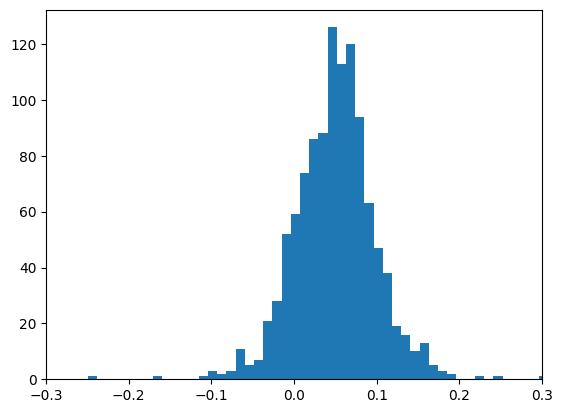

In [109]:
hcp = read_file(hcp_file)
hcp = plot_hist_asym(hcp)

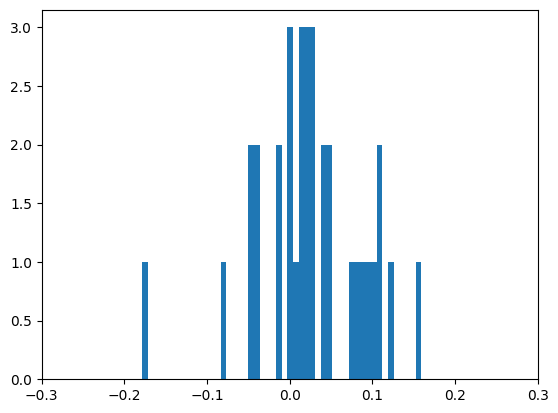

In [110]:
syn_db6 = read_file(syn_db6_file)
syn_db6 = plot_hist_asym(syn_db6)

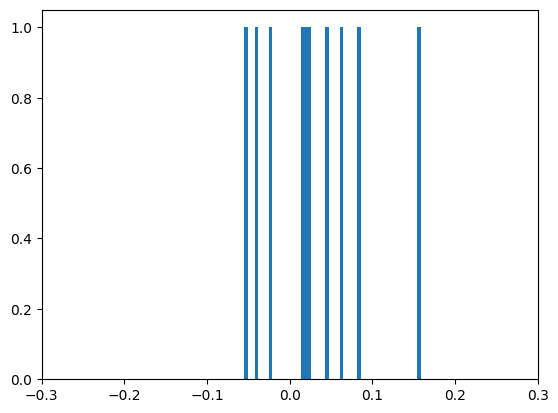

In [113]:
syn_dbNew = read_file(syn_dbNew_file)
syn_dbNew = plot_hist_asym(syn_dbNew)

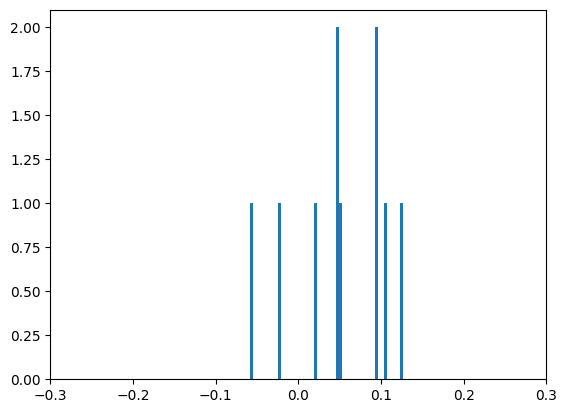

In [114]:
syn_dbNewL = read_file(syn_dbNewL_file)
syn_dbNewL = plot_hist_asym(syn_dbNewL)

In [118]:
syn = pd.concat([syn_db6, syn_dbNew, syn_dbNewL], axis=0)

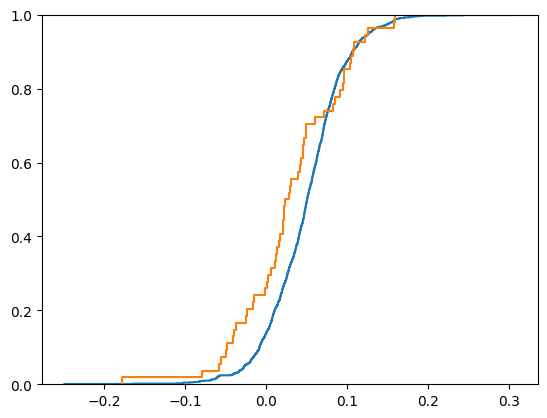

In [119]:
plt.ecdf(hcp.Asym)
plt.ecdf(syn.Asym)

In [64]:
models_path = glob.glob(f"{ukb_path}/*")

In [65]:
models_path[:5]

['/mnt/n4hukb/ns_morphologist/sub-1049910',
 '/mnt/n4hukb/ns_morphologist/sub-1070872',
 '/mnt/n4hukb/ns_morphologist/sub-3751903',
 '/mnt/n4hukb/ns_morphologist/sub-2661657',
 '/mnt/n4hukb/ns_morphologist/sub-4418577']

In [66]:
ukb = pd.DataFrame({})
for m_path in models_path[:1000]:
    subject = os.path.basename(m_path)
    if len(glob.glob(f"{m_path}/{sub_path}")):
        csv_file = glob.glob(f"{m_path}/{sub_path}")[0]
        morpho_one = pd.read_csv(csv_file, sep=";", index_col=0)
        for sulcus in ["S.T.s._left", "S.T.s._right"]:
            ukb.loc[subject, sulcus] = morpho_one.loc[sulcus, "meandepth_native"]

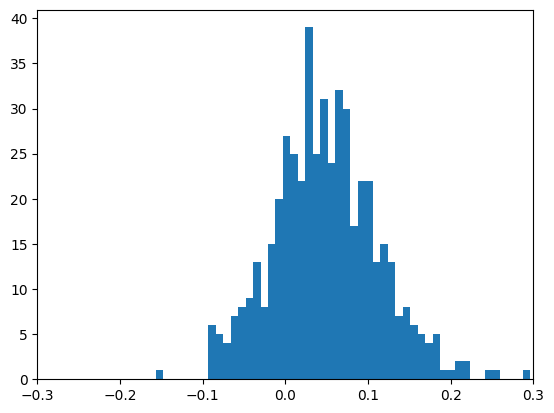

In [67]:
ukb = plot_hist_asym(ukb)

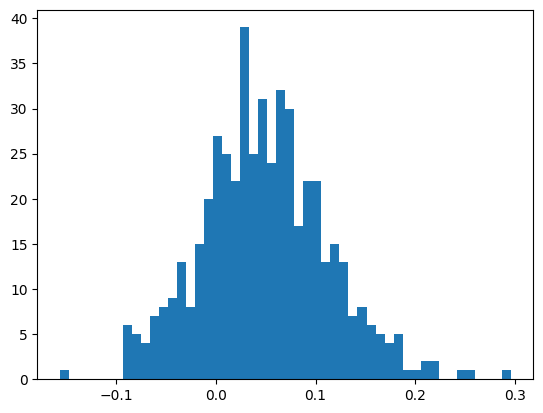

In [68]:
h = plt.hist(ukb["Asym"], bins=50)

(-0.3, 0.3)

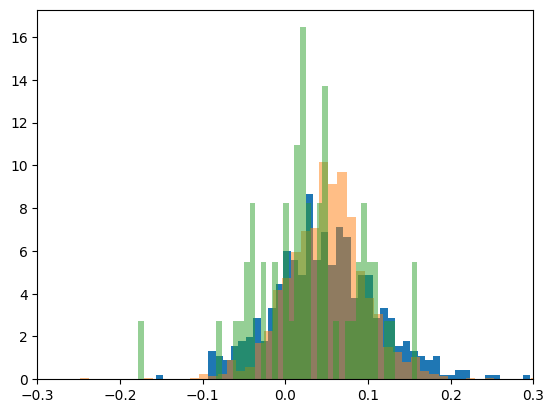

In [120]:
h = plt.hist(ukb["Asym"], bins=50, density=True)
h = plt.hist(hcp["Asym"], bins=50, density=True, alpha=0.5)
h = plt.hist(syn["Asym"], bins=50, density=True, alpha=0.5)
plt.xlim(-0.3, 0.3)

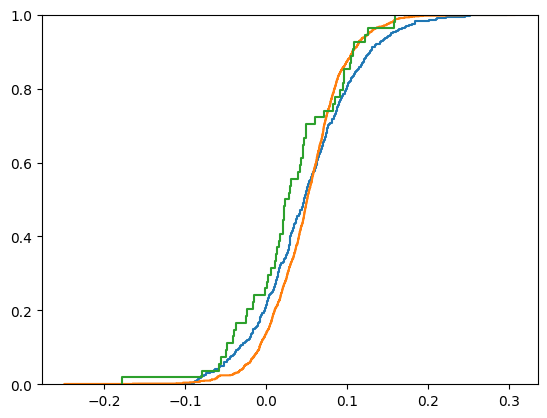

In [121]:
plt.ecdf(ukb.Asym)
plt.ecdf(hcp.Asym)
plt.ecdf(syn.Asym)

In [122]:
part = pd.read_csv(participants_file, index_col=0)
part.head()

,isSynesthete,NOM,DDN,IRM name,Date IRM,Âge,Sexe,Latéralité,Remarques,Code BV,Unnamed: 9,2=femme – 1=homme,0=droitier – 1=gaucher
participant_id,,,,,,,,,,,,,
mv_SYNESTHEX_3-Session1_S2_T1w,1,SARR,10/8/1996,Sujet01,28/2/2023,26.569863,2,0,NaN,3,NaN,NaN,NaN
mv_SYNESTHEX_S_Session1_S2_T1w,1,LEFR,14/12/1950,Sujet02,9/3/2023,72.282192,2,0,NaN,S,NaN,NaN,NaN
mv_SYNESTHEX_M_Session1_S2_T1w,1,FERN,NaN,Sujet03,NaN,23.680000,1,0,NaN,M,NaN,NaN,NaN
mv_SYNESTHEX_K_Session1_S2_T1w,1,DERO,27/6/1997,Sujet04,21/10/2023,26.334247,1,0,NaN,K,NaN,NaN,NaN
mv_SYNESTHEX_Sujet20_Session1_S2_T1w,1,DECH,NaN,Sujet05,NaN,21.110000,2,1,NaN,Sujet20,NaN,NaN,NaN


In [123]:
syn_all = syn.merge(part[["isSynesthete"]], left_index=True, right_index=True)
syn_all["_Asym"] = -syn_all["Asym"]

<Axes: xlabel='Asym', ylabel='Density'>

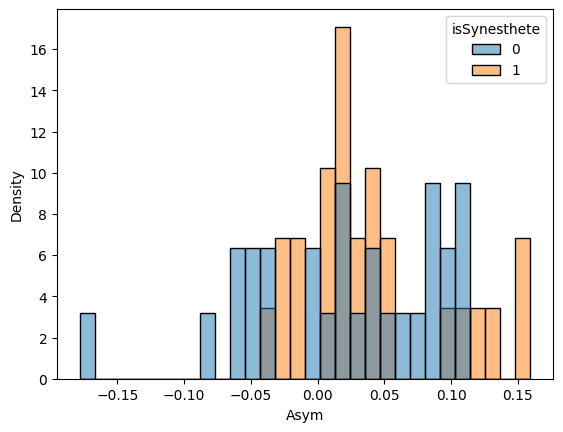

In [133]:
sns.histplot(data=syn_all, x="Asym", hue='isSynesthete', bins=30, common_norm=False, stat='density')

<Axes: xlabel='Asym', ylabel='Proportion'>

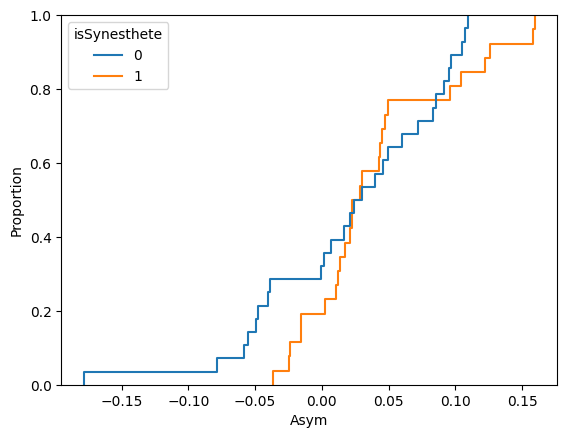

In [125]:
sns.ecdfplot(data=syn_all, x="Asym", hue='isSynesthete')

<Axes: xlabel='_Asym', ylabel='Proportion'>

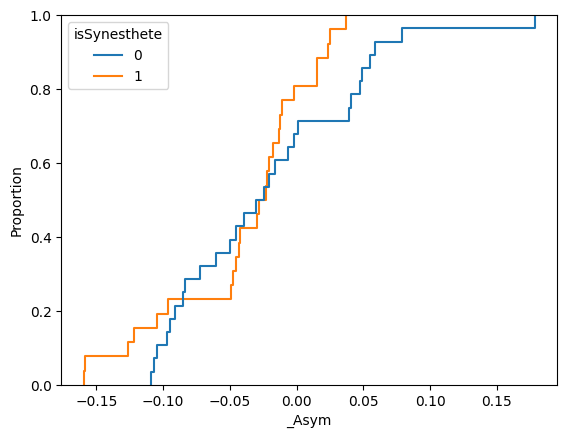

In [126]:
sns.ecdfplot(data=syn_all, x="_Asym", hue='isSynesthete')

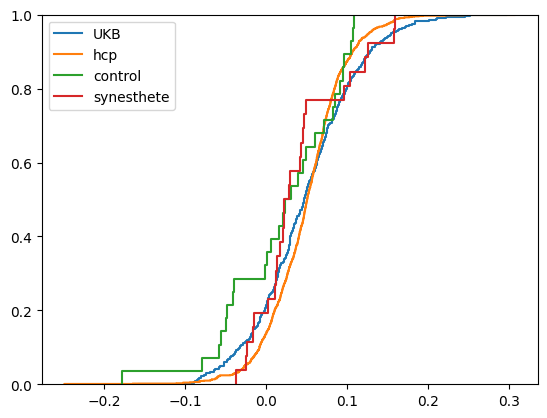

In [127]:
plt.ecdf(ukb.Asym, label="UKB")
plt.ecdf(hcp.Asym, label="hcp")
plt.ecdf(syn_all[syn_all.isSynesthete==0].Asym, label="control")
plt.ecdf(syn_all[syn_all.isSynesthete==1].Asym, label="synesthete")
plt.legend()

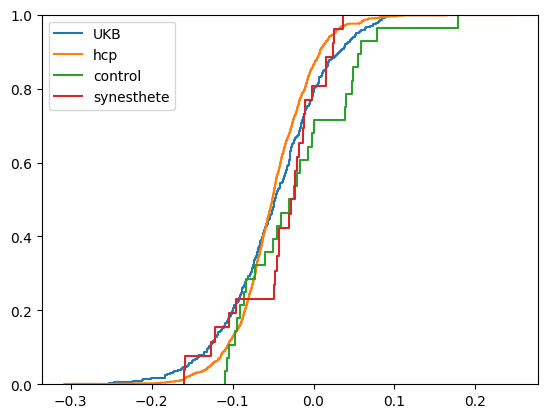

In [130]:
plt.ecdf(-ukb.Asym, label="UKB")
plt.ecdf(-hcp.Asym, label="hcp")
plt.ecdf(-syn_all[syn_all.isSynesthete==0].Asym, label="control")
plt.ecdf(-syn_all[syn_all.isSynesthete==1].Asym, label="synesthete")
plt.legend()